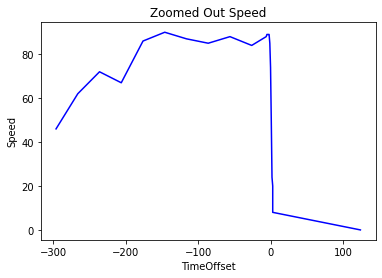

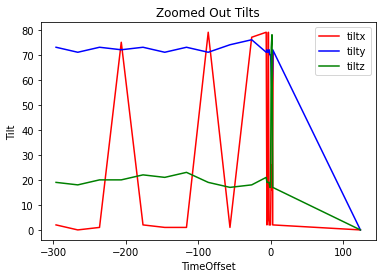

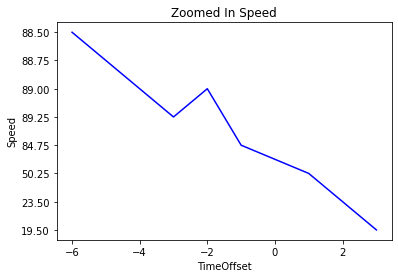

KeyError: 'timeoffset'

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df_categorised = pd.read_json('data/categorised.json')
df_uncategorised = pd.read_json('data/uncategorised.json')


accel_df = df_categorised['detail']

detail_dict = accel_df[1]

gps_df = df_categorised['journey']

journey_dict = gps_df[1]

#print(journey_dict)

# Zoomed out data, has long term speed and accelerometer data
zoomed_out_df = pd.DataFrame.from_dict(journey_dict)

# Zoomed in data, use to get the speed in smaller interval
zoomed_in_df = pd.DataFrame.from_dict(detail_dict)

# Extract the higher resolution accelerometer data for the crash
forces = zoomed_in_df['forces']
zoomed_in_tilts = []
for second in forces:
    force_1 = pd.DataFrame.from_dict(second)
    zoomed_in_tilts.append(force_1)

zoomed_in_tilts = pd.concat(zoomed_in_tilts)
# Need to replace the index column with time values here

# Graph Plotting
plt.plot(zoomed_out_df['timeoffset'], zoomed_out_df['speed'], label='Speed', color='blue')
plt.title('Zoomed Out Speed'), plt.xlabel('TimeOffset'), plt.ylabel('Speed')
plt.show()
plt.plot(zoomed_out_df['timeoffset'], zoomed_out_df['tiltx'], label='tiltx', color='red')
plt.plot(zoomed_out_df['timeoffset'], zoomed_out_df['tilty'], label='tilty', color='blue')
plt.plot(zoomed_out_df['timeoffset'], zoomed_out_df['tiltz'], label='tiltz', color='green')
plt.title('Zoomed Out Tilts'), plt.xlabel('TimeOffset'), plt.ylabel('Tilt')
plt.legend(loc='best')
plt.show()

plt.plot(zoomed_in_df['timeoffset'], zoomed_in_df['speed'], label='Speed', color='blue')
plt.title('Zoomed In Speed'), plt.xlabel('TimeOffset'), plt.ylabel('Speed')
plt.gca().invert_yaxis()
plt.show()

plt.plot(zoomed_in_tilts['timeoffset'], zoomed_in_tilts['tiltx'], label='tiltx', color='red')
plt.plot(zoomed_in_tilts['timeoffset'], zoomed_in_tilts['tilty'], label='tilty', color='blue')
plt.plot(zoomed_in_tilts['timeoffset'], zoomed_in_tilts['tiltz'], label='tiltz', color='green')
plt.title('Zoomed In Tilts'), plt.xlabel('TimeOffset'), plt.ylabel('Tilt')
plt.legend(loc='best')
plt.show()




## Code Structure
# Journey
Contains the GPS data